In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
df=pd.read_csv('train.csv')

In [3]:
#show data
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
x=df.drop(["MiscFeature"], axis=1)

In [5]:
x.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
#dimentionality reduction can be helpful for this dataset
#figure out the feature
a=df.columns.tolist()
drp_lst=['MSSubClass','MSZoning','LotFrontage','Alley','LandContour','LotConfig','Condition1', 'Condition2',
         'BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
        'Heating','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
        'BsmtHalfBath','HalfBath','KitchenQual','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
        'GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch',
        '3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','LotShape','LandSlope','Functional',
        'MoSold','YrSold','SaleType','SaleCondition','Utilities','HouseStyle','TotRmsAbvGrd','Id','Foundation','Street',
         'Neighborhood','Electrical']


In [7]:
#drop
x= df.drop(drp_lst, axis=1)
new_col=x.columns.tolist()
x.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,MiscVal,SalePrice
0,8450,7,5,2003,2003,856,2,3,1,0,208500
1,9600,6,8,1976,1976,1262,2,3,1,0,181500
2,11250,7,5,2001,2002,920,2,3,1,0,223500
3,9550,7,5,1915,1970,756,1,3,1,0,140000
4,14260,8,5,2000,2000,1145,2,4,1,0,250000


Do mean imputation

In [8]:
mean_value=x['MiscVal'].mean()
x['MiscVal'].replace(0, mean_value, inplace= True)
x.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,MiscVal,SalePrice
0,8450,7,5,2003,2003,856,2,3,1,43.489041,208500
1,9600,6,8,1976,1976,1262,2,3,1,43.489041,181500
2,11250,7,5,2001,2002,920,2,3,1,43.489041,223500
3,9550,7,5,1915,1970,756,1,3,1,43.489041,140000
4,14260,8,5,2000,2000,1145,2,4,1,43.489041,250000
5,14115,5,5,1993,1995,796,1,1,1,700.000000,143000
6,10084,8,5,2004,2005,1686,2,3,1,43.489041,307000
7,10382,7,6,1973,1973,1107,2,3,1,350.000000,200000
8,6120,7,5,1931,1950,952,2,2,2,43.489041,129900
9,7420,5,6,1939,1950,991,1,2,2,43.489041,118000


do normalize data

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
feature=scaler.fit_transform(x,None)
feature[:10]

array([[0.0334198 , 0.66666667, 0.5       , 0.94927536, 0.88333333,
        0.1400982 , 0.66666667, 0.375     , 0.33333333, 0.        ,
        0.24107763],
       [0.03879502, 0.55555556, 0.875     , 0.75362319, 0.43333333,
        0.20654664, 0.66666667, 0.375     , 0.33333333, 0.        ,
        0.20358284],
       [0.04650728, 0.66666667, 0.5       , 0.93478261, 0.86666667,
        0.15057283, 0.66666667, 0.375     , 0.33333333, 0.        ,
        0.26190807],
       [0.03856131, 0.66666667, 0.5       , 0.3115942 , 0.33333333,
        0.12373159, 0.33333333, 0.375     , 0.33333333, 0.        ,
        0.14595195],
       [0.06057632, 0.77777778, 0.5       , 0.92753623, 0.83333333,
        0.18739771, 0.66666667, 0.5       , 0.33333333, 0.        ,
        0.29870851],
       [0.05989857, 0.44444444, 0.5       , 0.87681159, 0.75      ,
        0.13027823, 0.33333333, 0.125     , 0.33333333, 0.04247472,
        0.15011804],
       [0.04105728, 0.77777778, 0.5       , 0.95652174, 0.

In [17]:
#feature array to new dataframe
new_df=df = pd.DataFrame(feature,columns=new_col)

In [18]:
new_df.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,MiscVal,SalePrice
0,0.033420,0.666667,0.500,0.949275,0.883333,0.140098,0.666667,0.375,0.333333,0.0,0.241078
1,0.038795,0.555556,0.875,0.753623,0.433333,0.206547,0.666667,0.375,0.333333,0.0,0.203583
2,0.046507,0.666667,0.500,0.934783,0.866667,0.150573,0.666667,0.375,0.333333,0.0,0.261908
3,0.038561,0.666667,0.500,0.311594,0.333333,0.123732,0.333333,0.375,0.333333,0.0,0.145952
4,0.060576,0.777778,0.500,0.927536,0.833333,0.187398,0.666667,0.500,0.333333,0.0,0.298709


In [19]:
new_df.rename(columns={'FullBath':'Bath','BedroomAbvGr':'BedRm',
                 'KitchenAbvGr':'kitchen'}, inplace=True)
new_df.head(3)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,Bath,BedRm,kitchen,MiscVal,SalePrice
0,0.033420,0.666667,0.500,0.949275,0.883333,0.140098,0.666667,0.375,0.333333,0.0,0.241078
1,0.038795,0.555556,0.875,0.753623,0.433333,0.206547,0.666667,0.375,0.333333,0.0,0.203583
2,0.046507,0.666667,0.500,0.934783,0.866667,0.150573,0.666667,0.375,0.333333,0.0,0.261908


In [20]:
x.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,MiscVal,SalePrice
0,8450,7,5,2003,2003,856,2,3,1,43.489041,208500
1,9600,6,8,1976,1976,1262,2,3,1,43.489041,181500
2,11250,7,5,2001,2002,920,2,3,1,43.489041,223500
3,9550,7,5,1915,1970,756,1,3,1,43.489041,140000
4,14260,8,5,2000,2000,1145,2,4,1,43.489041,250000


In [33]:
#segregate dataset
features=x.iloc[:,:-1]
features.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,MiscVal
0,8450,7,5,2003,2003,856,2,3,1,43.489041
1,9600,6,8,1976,1976,1262,2,3,1,43.489041
2,11250,7,5,2001,2002,920,2,3,1,43.489041
3,9550,7,5,1915,1970,756,1,3,1,43.489041
4,14260,8,5,2000,2000,1145,2,4,1,43.489041


In [35]:
#segregate label
label=x.iloc[:,-1]
label.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
#split data in train test 
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3, random_state=42)

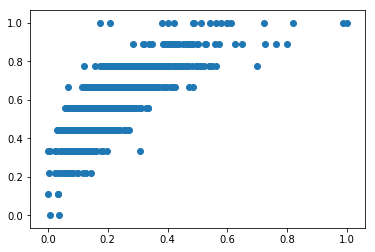

((1460L, 1L), (1460L, 1L))

In [91]:

#plotting
price=x.iloc[:,-1].values
quality=x.iloc[:,1].values
#do normalize data
price=np.reshape(price,(price.shape[0],1))
quality=np.reshape(quality,(quality.shape[0],1))
price=scaler.fit_transform(price)
quality=scaler.fit_transform(quality)
plt.scatter(price,quality)
#plt.plot(quality,color='y')
plt.show()
quality.shape,price.shape

In [74]:
price.shape

(1460L, 1L)